## MNIST CNN

In [28]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Lambda, MaxPooling2D
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import BatchNormalization

from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.utils import to_categorical

In [29]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [30]:
print(f"Training veri boyutu: {train.shape}\nTest veri boyutu: {test.shape}")

Training veri boyutu: (42000, 785)
Test veri boyutu: (28000, 784)


In [31]:
X = train.drop(['label'], 1).values
y = train['label'].values

/var/folders/kr/f0qmqqxs5p19_gxt95ch4jn00000gn/T/ipykernel_53609/2430759019.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = train.drop(['label'], 1).values


In [32]:
X = X / 255.0
X = X.reshape(-1,28,28,1)

In [33]:
y = to_categorical(y)

print(f"Etiket boyutu: {y.shape}")

Etiket boyutu: (42000, 10)


In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

In [35]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((37800, 28, 28, 1), (4200, 28, 28, 1), (37800, 10), (4200, 10))

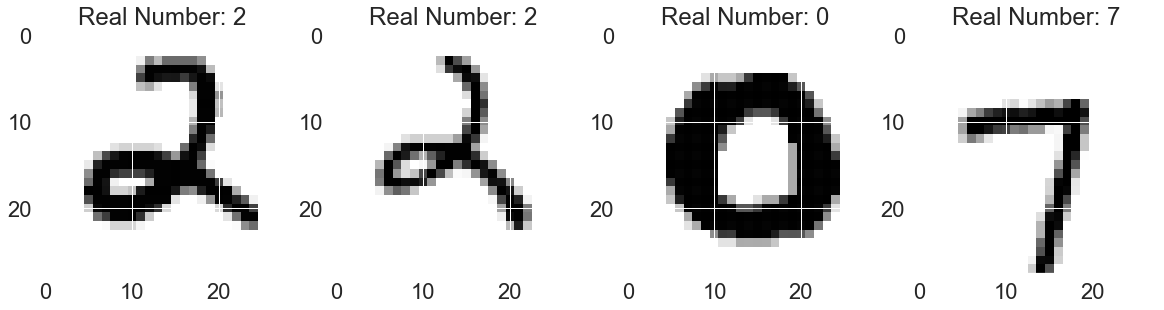

In [36]:
X_train__ = X_train.reshape(X_train.shape[0], 28, 28)

fig, axis = plt.subplots(1, 4, figsize=(20, 10))
for i, ax in enumerate(axis.flat):
    ax.imshow(X_train__[i], cmap='binary')
    digit = y_train[i].argmax()
    ax.set(title = f"Real Number: {digit}")

In [37]:
mean = np.mean(X_train)
std = np.std(X_train)

def standardize(x):
    return (x-mean)/std

In [42]:
model=Sequential()
  
model.add(Conv2D(filters=64, kernel_size = (3,3), activation="relu", input_shape=(28,28,1)))
model.add(Conv2D(filters=64, kernel_size = (3,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())

model.add(Conv2D(filters=128, kernel_size = (3,3), activation="relu"))
model.add(Conv2D(filters=128, kernel_size = (3,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())    

model.add(Conv2D(filters=256, kernel_size = (3,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
    
model.add(Flatten())
model.add(Dense(512,activation="relu"))
    
model.add(Dense(10,activation="softmax"))
    
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [43]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 12, 12, 64)        256       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 128)       73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 128)         147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 128)         0

In [44]:
datagen = ImageDataGenerator(
        featurewise_center=False,
        samplewise_center=False,
        featurewise_std_normalization=False,
        samplewise_std_normalization=False,
        zca_whitening=False,
        rotation_range=15,
        zoom_range = 0.01,
        width_shift_range=0.1,
        height_shift_range=0.1,
        horizontal_flip=False,
        vertical_flip=False)

train_gen = datagen.flow(X_train, y_train, batch_size=128)
test_gen = datagen.flow(X_test, y_test, batch_size=128)

In [47]:
epochs = 100
batch_size = 128
train_steps = X_train.shape[0] // batch_size
valid_steps = X_test.shape[0] // batch_size

es = tensorflow.keras.callbacks.EarlyStopping(
        monitor="val_acc",
        patience=10,
        verbose=1,
        mode="max",
        restore_best_weights=True, # 
     )

rp = tensorflow.keras.callbacks.ReduceLROnPlateau(
        monitor="val_acc",
        factor=0.2,
        patience=3,
        verbose=1,
        mode="max",
        min_lr=0.00001,
     )

In [48]:
history = model.fit_generator(train_gen, 
                              epochs = epochs, 
                              steps_per_epoch = train_steps,
                              validation_data = test_gen,
                              validation_steps = valid_steps, 
                              callbacks=[es, rp])

Epoch 1/100
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


/opt/homebrew/Caskroom/miniforge/base/envs/tf_m1/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '
2022-08-10 16:24:00.221521: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2022-08-10 16:24:00.221789: W tensorflow/core/platform/profile_utils/cpu_utils.cc:126] Failed to get CPU frequency: 0 Hz


295/295 [==============================] - ETA: 0s - loss: 0.3625 - accuracy: 0.8870WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x2aa3e3040> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
295/295 [==============================] - 24s 82ms/step - loss: 0.3618 - accuracy: 0.8872 - val_loss: 1.4837 - val_accuracy: 0.4089
Epo

Epoch 17/100
295/295 [==============================] - 24s 81ms/step - loss: 0.0194 - accuracy: 0.9940 - val_loss: 0.0277 - val_accuracy: 0.9929
Epoch 18/100
295/295 [==============================] - 24s 82ms/step - loss: 0.0238 - accuracy: 0.9928 - val_loss: 0.0285 - val_accuracy: 0.9907
Epoch 19/100
295/295 [==============================] - 24s 81ms/step - loss: 0.0147 - accuracy: 0.9953 - val_loss: 0.0347 - val_accuracy: 0.9888
Epoch 20/100
295/295 [==============================] - 24s 81ms/step - loss: 0.0171 - accuracy: 0.9944 - val_loss: 0.0285 - val_accuracy: 0.9917
Epoch 21/100
295/295 [==============================] - 24s 81ms/step - loss: 0.0189 - accuracy: 0.9943 - val_loss: 0.0292 - val_accuracy: 0.9912
Epoch 22/100
295/295 [==============================] - 24s 81ms/step - loss: 0.0147 - accuracy: 0.9952 - val_loss: 0.0357 - val_accuracy: 0.9893
Epoch 23/100
295/295 [==============================] - 24s 81ms/step - loss: 0.0157 - accuracy: 0.9948 - val_loss: 0.0247 -

Epoch 35/100
295/295 [==============================] - 24s 81ms/step - loss: 0.0115 - accuracy: 0.9961 - val_loss: 0.0346 - val_accuracy: 0.9917
Epoch 36/100
295/295 [==============================] - 24s 81ms/step - loss: 0.0122 - accuracy: 0.9962 - val_loss: 0.0490 - val_accuracy: 0.9868
Epoch 37/100
295/295 [==============================] - 24s 81ms/step - loss: 0.0124 - accuracy: 0.9963 - val_loss: 0.0200 - val_accuracy: 0.9937
Epoch 38/100
295/295 [==============================] - 24s 81ms/step - loss: 0.0088 - accuracy: 0.9973 - val_loss: 0.0296 - val_accuracy: 0.9912
Epoch 39/100
295/295 [==============================] - 24s 81ms/step - loss: 0.0100 - accuracy: 0.9971 - val_loss: 0.0400 - val_accuracy: 0.9912
Epoch 40/100
295/295 [==============================] - 24s 81ms/step - loss: 0.0068 - accuracy: 0.9974 - val_loss: 0.0351 - val_accuracy: 0.9917
Epoch 41/100
295/295 [==============================] - 24s 81ms/step - loss: 0.0097 - accuracy: 0.9967 - val_loss: 0.0341 -

Epoch 53/100
295/295 [==============================] - 26s 87ms/step - loss: 0.0053 - accuracy: 0.9980 - val_loss: 0.0238 - val_accuracy: 0.9922
Epoch 54/100
295/295 [==============================] - 25s 86ms/step - loss: 0.0056 - accuracy: 0.9984 - val_loss: 0.0325 - val_accuracy: 0.9922
Epoch 55/100
295/295 [==============================] - 26s 87ms/step - loss: 0.0092 - accuracy: 0.9969 - val_loss: 0.0241 - val_accuracy: 0.9944
Epoch 56/100
295/295 [==============================] - 26s 87ms/step - loss: 0.0079 - accuracy: 0.9975 - val_loss: 0.0342 - val_accuracy: 0.9917
Epoch 57/100
295/295 [==============================] - 26s 88ms/step - loss: 0.0091 - accuracy: 0.9971 - val_loss: 0.0233 - val_accuracy: 0.9937
Epoch 58/100
295/295 [==============================] - 26s 89ms/step - loss: 0.0046 - accuracy: 0.9987 - val_loss: 0.0304 - val_accuracy: 0.9944
Epoch 59/100
295/295 [==============================] - 26s 87ms/step - loss: 0.0064 - accuracy: 0.9977 - val_loss: 0.0277 -

Epoch 71/100
295/295 [==============================] - 28s 96ms/step - loss: 0.0083 - accuracy: 0.9973 - val_loss: 0.0514 - val_accuracy: 0.9922
Epoch 72/100
295/295 [==============================] - 28s 94ms/step - loss: 0.0050 - accuracy: 0.9980 - val_loss: 0.0407 - val_accuracy: 0.9932
Epoch 73/100
295/295 [==============================] - 28s 96ms/step - loss: 0.0069 - accuracy: 0.9981 - val_loss: 0.0244 - val_accuracy: 0.9941
Epoch 74/100
295/295 [==============================] - 29s 98ms/step - loss: 0.0045 - accuracy: 0.9984 - val_loss: 0.0219 - val_accuracy: 0.9937
Epoch 75/100
295/295 [==============================] - 28s 96ms/step - loss: 0.0033 - accuracy: 0.9987 - val_loss: 0.0249 - val_accuracy: 0.9927
Epoch 76/100
295/295 [==============================] - 28s 96ms/step - loss: 0.0075 - accuracy: 0.9979 - val_loss: 0.0296 - val_accuracy: 0.9946
Epoch 77/100
295/295 [==============================] - 29s 99ms/step - loss: 0.0054 - accuracy: 0.9981 - val_loss: 0.0268 -

Epoch 89/100
295/295 [==============================] - 28s 95ms/step - loss: 0.0056 - accuracy: 0.9985 - val_loss: 0.0264 - val_accuracy: 0.9922
Epoch 90/100
295/295 [==============================] - 28s 96ms/step - loss: 0.0059 - accuracy: 0.9981 - val_loss: 0.0300 - val_accuracy: 0.9929
Epoch 91/100
295/295 [==============================] - 28s 94ms/step - loss: 0.0042 - accuracy: 0.9985 - val_loss: 0.0342 - val_accuracy: 0.9929
Epoch 92/100
295/295 [==============================] - 28s 94ms/step - loss: 0.0042 - accuracy: 0.9988 - val_loss: 0.0358 - val_accuracy: 0.9932
Epoch 93/100
295/295 [==============================] - 29s 97ms/step - loss: 0.0034 - accuracy: 0.9989 - val_loss: 0.0253 - val_accuracy: 0.9946
Epoch 94/100
295/295 [==============================] - 27s 93ms/step - loss: 0.0044 - accuracy: 0.9987 - val_loss: 0.0315 - val_accuracy: 0.9937
Epoch 95/100
295/295 [==============================] - 27s 92ms/step - loss: 0.0051 - accuracy: 0.9979 - val_loss: 0.0362 -

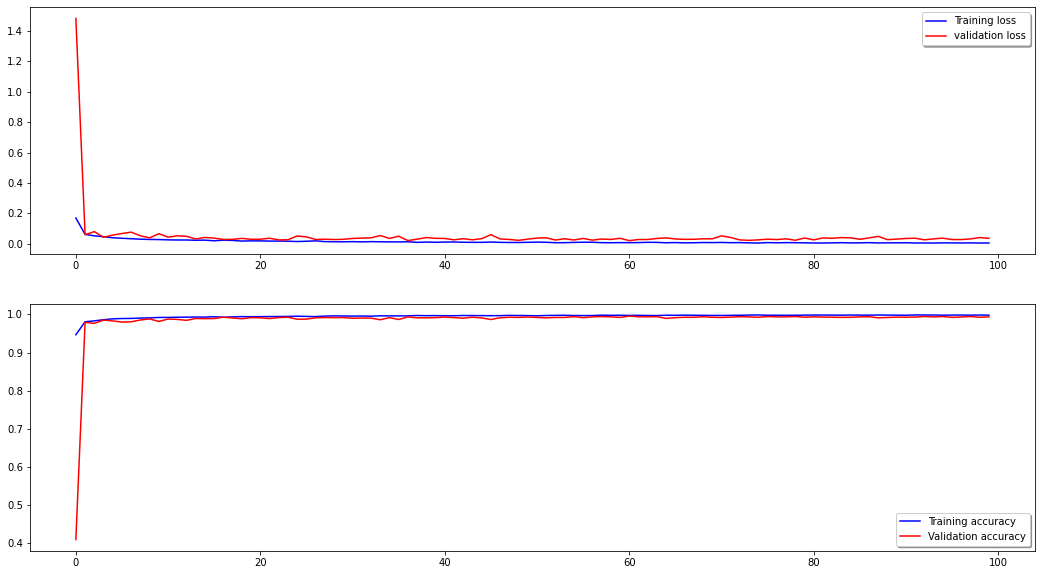

In [67]:
fig, ax = plt.subplots(2,1, figsize=(18, 10))
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

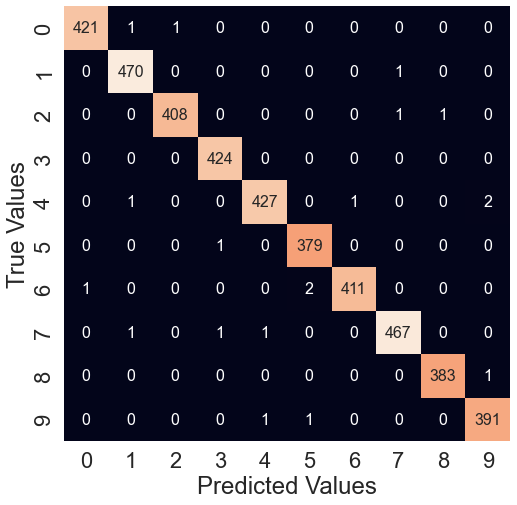

0.9954761904761905

In [97]:
from sklearn.metrics import confusion_matrix

fig = plt.figure(figsize=(8, 8))

y_pred = model.predict(X_test)

Y_pred = np.argmax(y_pred, 1)
Y_test = np.argmax(y_test, 1)

mat = confusion_matrix(Y_test, Y_pred)

sns.set(font_scale=2)
sns.heatmap(mat.T, annot=True, cbar = False, annot_kws={'size': 16}, fmt='.0f')

#sns.heatmap(mat.T, square=True, annot=True, cbar=False, cmap=plt.cm.PuBuGn,fmt="d")
#sns.heatmap(mat.T, square=True, annot=True, cbar=False, cmap=plt.cm.Blues, fmt='.0f')

plt.xlabel('Predicted Values')
plt.ylabel('True Values');
plt.show();

from sklearn.metrics import accuracy_score
print("Test Accuracy: " + accuracy_score(Y_test, Y_pred).__str__())

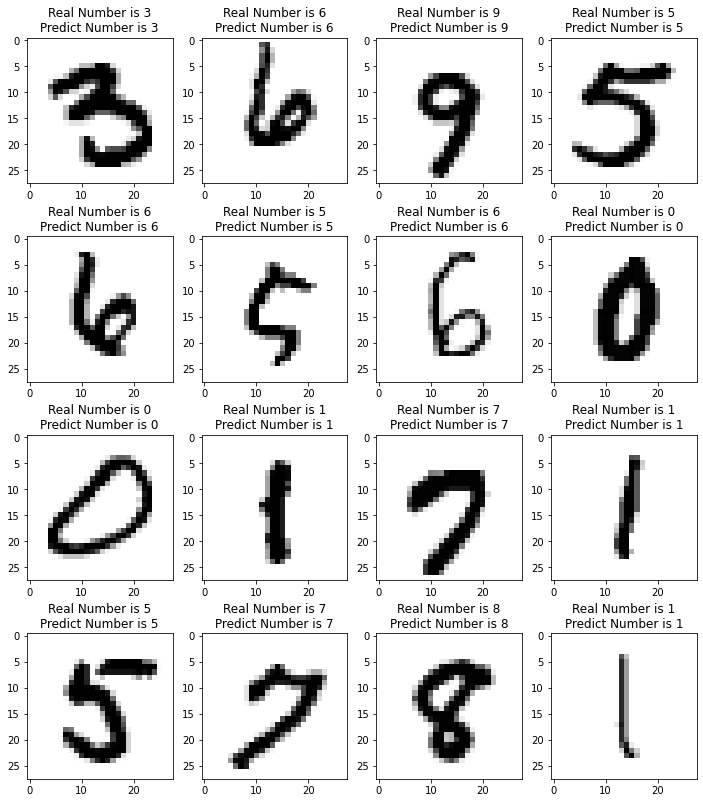

In [69]:
y_pred = model.predict(X_test)
X_test__ = X_test.reshape(X_test.shape[0], 28, 28)

fig, axis = plt.subplots(4, 4, figsize=(12, 14))
for i, ax in enumerate(axis.flat):
    ax.imshow(X_test__[i], cmap='binary')
    ax.set(title = f"Real Number is {y_test[i].argmax()}\nPredict Number is {y_pred[i].argmax()}");